# Evaluation Metrics and Scoring

We will use the widely popular sklearn library to demonstrate how evaluation metrics work.  It should be noted that there are multiple ways to perform evaluation in sklearn.  First, each ML algorithm implemented in sklearn comes with its own evaluation method "out of the box".  This will be demonstrated down the road in the course, when we use these algoriths.
The second, which is featured in this notebook, is by using sklearn.metrics.

For a complete reference, refer to:
https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Regression Evaluation Metrics

In [2]:
# Let's create a small toy dataset containing labels (y) and predictions
# (y_hat) only.  We will not be needing features here.
# The data here will be stored in numpy arrays, although generally
# you can apply the sklearn evaluation metrics on pandas Series (columns of
# dataframes) or even python lists.
y = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
y_hat = np.array([1.0, 2.5, 2.7, 5.0, 5.5])


In [3]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_hat)

0.31799999999999995

In [4]:
# Verify that you get the same as below:
MSE = np.mean(np.square(y-y_hat))
MSE

0.31799999999999995

In [5]:
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y, y_hat)
MAE

0.45999999999999996

In [6]:
# Verify it's the same
np.mean(np.abs(y-y_hat))

0.45999999999999996

In [7]:
from sklearn.metrics import mean_absolute_percentage_error

MAPE = mean_absolute_percentage_error(y, y_hat)
MAPE

0.13999999999999996

In [8]:
# Verify it's the same
np.mean(np.abs(y - y_hat)/np.abs(y))

0.13999999999999996

In [9]:
from sklearn.metrics import r2_score
r2_score(y, y_hat)

0.841

In [10]:
# verify it's the same
1 - MSE / np.var(y)

0.841

## Classification - Hard Prediction

In [11]:
y = np.array([1,1,1,1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1])
y_hat = np.array([1,1,1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1])


In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_hat)

0.75

In [13]:
# Verify that it is the same as below.
# "y==y_hat" is an array of True/False, with "True" at indices where the two
# arrays are equal, and  False otherwise.  The "np.sum" of that is the number
# of "True"s, beacuse when you sum up booleans, the Trues are interpreted as 1's
# and the Falses are 0's.
np.sum(y == y_hat)/len(y)

0.75

In [14]:
# Error rate
from sklearn.metrics import zero_one_loss
zero_one_loss(y, y_hat)

0.25

In [15]:
# Verify it's the same
np.sum(y != y_hat)/len(y)

0.25

In [16]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y, y_hat)
conf

array([[7, 1],
       [3, 5]])

In [17]:
# Check that it is the same
TN, FP, FN, TP = \
    np.sum((y==-1)*(y_hat==-1)), np.sum((y==-1)*(y_hat==1)), \
    np.sum((y==1)*(y_hat==-1)), np.sum((y==1)*(y_hat==1))
np.array([[TN, FP],
          [FN, TP]])

array([[7, 1],
       [3, 5]])

In [18]:
from sklearn.metrics import precision_score
precision = precision_score(y, y_hat)
precision

0.8333333333333334

In [19]:
# Verify it's the same
TP/(TP+FP)

0.8333333333333334

In [20]:
from sklearn.metrics import recall_score
recall = recall_score(y, y_hat)
recall

0.625

In [21]:
# Verify it's the same
TP/(TP+FN)

0.625

In [22]:
from sklearn.metrics import f1_score
f1_score(y, y_hat)

0.7142857142857143

In [23]:
# Verify it's the same
2 * precision * recall / (precision + recall)

0.7142857142857143

# Classification - Soft Prediction

In [24]:
# label: -1 or +1
# prediction: probability of +1
y = np.array([1,1,1,1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1])
y_hat = np.array([0.9,0.95,0.7,0.2,0.1,0.051,0.06,0.8,0.89,0.49,0.4,0.45,0.61,0.3,0.35,0.36])

In [25]:
# Convert soft prediction to hard prediction using threshold
thresh = 0.6
y_hat_hard = np.where(y_hat > thresh, 1, -1)
y_hat_hard

array([ 1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1, -1, -1, -1])

In [26]:
# Cross-entropy loss
from sklearn.metrics import log_loss

In [27]:
# sklearn's log_loss expects 0/1 labels (instead of -1, +1).  (y+1)/2 converts.
log_loss(((y+1)/2), y_hat)

1.0376544542023414

In [28]:
# Check that it's the same
np.mean(-(1+y)/2 * np.log(y_hat) - (1-y)/2 * np.log(1-y_hat))

1.0376544542023414

In [29]:
from sklearn.metrics import roc_curve
# ROC curve = FPR vs TPR
FPR, TPR, _ = roc_curve(y, y_hat)

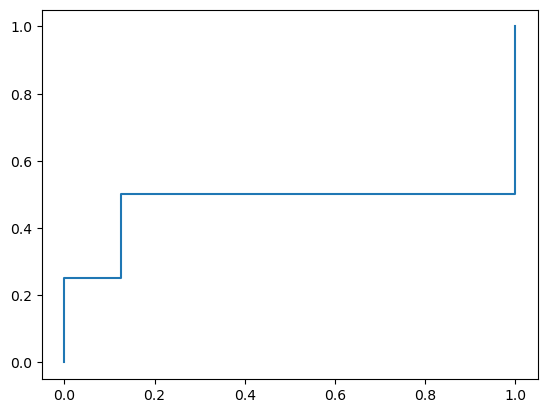

In [30]:
plt.plot(FPR, TPR)

In [31]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y, y_hat)

0.46875

In [32]:
# Check that it equals equivalent definition of auc

negative_indices = np.where(y==-1)[0]
positive_indices = np.where(y==1)[0]

# number of (negative,positive) pairs for which y_hat is ordered correctly
num_pairs_ordered_correctly = np.sum(
    [[y_hat[j] > y_hat[k]
      for k in negative_indices]
        for j in positive_indices])

# number of (negative, positve) pairs
num_pairs = len(negative_indices) * len(positive_indices)

# AUC = ratio of last two expressions
num_pairs_ordered_correctly / num_pairs

0.46875